In [2]:
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from fractions import Fraction
import time
import sys

dyn_pendulum = {"g":9.81, "m": 1.0, "l": 1.0}
x0 = np.array([np.pi-0.1, 0.0])
v1 = np.array([1.0, 0.0])
v2 = np.array([0.0, 1.0])
x_dot = []
x_norm = []
# cum = np.array([0,0,0])

# def cosin 

def simple_pendulum (x0, dyn):
    g = dyn['g'] 
    l = dyn['l']
    #print (x0)
    return np.array([x0[1], (-g/l)*np.sin(x0[0])])


def RungeKutta (dyn, f, dt, x0):
    k1 = f(x0, dyn) #[x,y,z]*0.1 example
    k2 = f(x0+0.5*k1*dt,dyn)
    k3 = f(x0 + 0.5*k2*dt, dyn)
    k4 = f(x0 + k3*dt, dyn)
    
    x = x0 + ((k1 + 2*k2 + 2*k3 + k4)/6) *dt
    return x

def f_t (dyn, f, dt, x0, T):
    x = np.empty(shape=(len(x0),T))
    #print(x.shape)
    x[:, 0] = x0
    # print ('x:', x)
    # print ('x[:, 0]:', x[:, 0])
    # print ('x0:', x0)
    for i in range(1,T):
        x[:, i] = RungeKutta(dyn, f, dt, x[:, i-1])
    return x


In [40]:
def sample_based_truncated_le (x, evolv, dt, scalmx, scalmn):
    IND = 0
    SUM = 0.0
    ITS = 0
    IND2 = 0

    DI = np.inf #any large number

    NPT = len(x.T)
    DIM = 2
    TAU_physical = 0.3
    TAU = int(TAU_physical/dt)
    DT = dt
    SCALMX = scalmx
    SCALMN = scalmn
    
    EVOLV_physical = evolv #time from t0 to t1
    EVOLV = int(EVOLV_physical/dt)
    
    
    Z = np.empty([NPT,DIM])
    for i in range(int(NPT)):
        for j in range(DIM):
            Z[i][j] = x[i + (j-1)*TAU]
    NPT = len(Z)
    #find nearest neighbor to the first data point
    for i in range(1, int(NPT)-(EVOLV)):
        D = 0.0
        #iterate through the array, compare first point with the rest
        D = np.linalg.norm(Z[IND] - Z[i])
        if ((D<DI) and (D>=SCALMN)):
            print (D)
            DI = D
            IND2 = i
    
    SUM_list = []
    while ((IND + EVOLV < NPT) and (IND2 + EVOLV < NPT)): #40
        PT1 = Z[IND+EVOLV]
        PT2 = Z[IND2+EVOLV]
        DF = np.linalg.norm(PT1 - PT2)
        ITS = ITS + 1
        SUM_list.append(SUM)
        SUM = SUM + np.log2(DF/DI) / EVOLV_physical
        ZLYAP = SUM/ITS

        INDOLD = IND2
        ZMULT = 1.0
        ANGLMX = 0.3
        THMIN = 3.14
#         while (True): #70

#             for i in range (int(NPT)): #100
#                 III = int(np.absolute(i-(IND+EVOLV)))
#                 if (III >= 10):
#                     #find angular change old to new vector
#                     DNEW = 0.0
#                     DNEW = np.linalg.norm(PT1 - Z[i])
#                     if ((DNEW <= ZMULT*SCALMX) and (DNEW >= SCALMN)):
#                         DOT = 0.0
#                         DOT = np.dot((PT1 - Z[i]),(PT1 - PT2))
#                         CTH = np.absolute(DOT/(DNEW*DF))
#                         #print(CTH)
#                         if (CTH > 1.0):
#                             CTH = 1.0
#                         TH = np.arccos(CTH)
#                         #save smallest angular change so far
#                         if TH <= THMIN:
#                             THMIN = TH
#                             DII = DNEW
#                             IND2 = i
#             if (THMIN < ANGLMX):
#                 #print ("here")
#                 break
#             # look at longer distance if cant find replacement
#             ZMULT = ZMULT + 1
#             if (ZMULT > 5):
#                 #no replacement at 5*scale, double search angle, reset distance
#                 ZMULT = 1.0
#                 ANGLMX = 2.0*ANGLMX
#             if (ANGLMX >= 3.14):
#                 IND2 = INDOLD + EVOLV
#                 DII = DF
        IND = IND + EVOLV
        if (IND > NPT):
            print('here')
            break
#         print ("IND, IND2, NPT", IND, IND2, NPT)
#         DI = DII
        
    return ZLYAP

In [41]:
1500/2*0.001

0.75

In [42]:
T = 1500
X = np.array(np.meshgrid(np.arange(0 , 2*np.pi, 0.2),
                      np.arange(-8 , 8, 0.2)))

X_reshaped = X.T.reshape(X.T.shape[0]*X.T.shape[1],2)
# new_test_sin = np.array([np.sin(X_reshaped.T[0]),X_reshaped.T[1]])
cum_list = []
for i in X_reshaped:
    x = f_t(dyn_pendulum, simple_pendulum, 0.001, i, T)
    cum_list.append(sample_based_truncated_le (x[0],0.75,0.001,10,1e-17))
    
zs = np.array(cum_list)

0.010352654941651655
0.010361154336191388
0.01038396441806688
0.010359491435179129
0.010181803127374597
0.009710645374636942
0.0088453203498771
0.007684161083594764
0.006644292352925358
0.006211495456007379
0.006385034545273593
0.006761150383068074
0.00704805949007922
0.007164742542544318
0.007129620908449999
0.006984545679690967
0.006767121068653618
0.006504872540702262
0.006216353766625459
0.005913586482201694
0.0056041914163716
0.00529292322338406
0.004982697097847515
0.004675253477438276
0.004371582520550193
0.004072193960012593
0.0037772887163907147
0.003486868350191877
0.00320080516172004
0.0029188873054162906
0.002640847974787125
0.002366384383053882
0.002095170172828761
0.001826863570168332
0.0015611127647539033
0.0012975594688281228
0.0010358412708473918
0.0007755931854453874
0.0005164486650648414
0.0002580402525174391
1.8322282716911847e-17
0.0002580402525174582
0.0005164486650648612
0.0007755931854454079
0.001035841270847403
0.001297559468828151
0.001561112764753932
0.001826

0.0058325534991433125
0.0069792071464274425
0.008431859362264914
0.009306112770871318
0.009599022105346198
0.009590870640113278
0.009496903850809306
0.009424848437184346
0.009415462788918546
0.009478331510072099
0.009611418602153046
0.010816276101877347
0.0107751336239984
0.010740173194148417
0.01068386909736732
0.010568072577450687
0.010346509871328248
0.00997334438809321
0.009419027958763974
0.008690260322759751
0.007844596009664601
0.006987176566688835
0.006242303812938803
0.005705976263040082
0.005404174206039173
0.005290535847622458
0.0052857227518513785
0.005319187776778614
0.005345846955575564
0.005343464974474362
0.0053045191828294995
0.005229319572781136
0.005121666191033414
0.004986479921518694
0.004828646431182206
0.0046525267348727665
0.004461806758336883
0.0042595059844420255
0.00404805201116462
0.0038293754808290405
0.0036050049620356475
0.0033761542739981047
0.0031438013553711343
0.002908761446352951
0.0026717601072384057
0.0024335150273178175
0.0021948416361943475
0.001

0.008077848447772427
0.007924160111657813
0.007694394593695694
0.007519181253206066
0.007433948468237407
0.0074387658715100976
0.007523797738800929
0.00767871166191197
0.0078954662451969
0.008168495874485433
0.008493903684027655
0.008868299712856426
0.00928756734082921
0.009745746877987639
0.01023422449153583
0.010741419650999012
0.011253123715811048
0.011292324078114247
0.011187117520460168
0.011103618575948195
0.011034382687476564
0.010969469569989407
0.010896337448333127
0.010800147216931745
0.010664647025598644
0.010473729155765846
0.010213583009915123
0.009875127814975918
0.009456174077264169
0.008962662155462018
0.008408471912717165
0.007813690269541596
0.00720171087173056
0.006595891710397793
0.006016556611466336
0.005478911464491042
0.004992105657864854
0.004559363412605723
0.004178918228594379
0.003845405337456477
0.0035513719455816605
0.0032886304803007214
0.0030492867721272246
0.0028263931498984625
0.0026142712536885424
0.0024086011171991777
0.0022063849833174635
0.002005884

0.005349448439038905
0.0051124424724704335
0.004972436652120471
0.004918499110741819
0.004938386693880608
0.005021211320297751
0.00515833115832191
0.005343451976253626
0.005572349072954461
0.00584239758303543
0.006151998866308584
0.006499944633902741
0.006884746848725923
0.007303969746383728
0.007753621687026467
0.008227689291528837
0.008717913199751225
0.00921390159990202
0.009703643960864742
0.010174419689966784
0.010614004330292998
0.011011984590187941
0.011360937735799076
0.011657239756095096
0.01190134628903197
0.012097516335837305
0.012253076729852664
0.012377412306006728
0.012034724335648943
0.011944883160163918
0.011862079916121038
0.011777843573147184
0.01168253092690292
0.011565800740711545
0.011417344847504469
0.011227834209205716
0.01098996904023338
0.010699460079770932
0.010355738890475327
0.009962220715781043
0.009526028306802317
0.009057207907505025
0.008567588099319285
0.008069506396378
0.0075746351385245336
0.007093083990242216
0.006632869330452267
0.006199753937053727

0.0022801494272659045
0.002267466274975417
0.0023026944087782006
0.002380342114784244
0.0024946270856957974
0.0026403705647187366
0.0028135826452155544
0.0030117120930651118
0.0032336540955845905
0.0034796149617377986
0.003750891208061533
0.004049579173287583
0.0043782068508729614
0.0047392733279750755
0.005134690623934331
0.0055651451997517235
0.006029428879263208
0.006523826520829572
0.007041682402042338
0.007573286490082641
0.008106209543617625
0.008626157725913703
0.009118310123632024
0.009568966157330556
0.0099672095664679
0.01030624668771458
0.010584134217115512
0.010803764482208255
0.010972167269345039
0.011099343138019411
0.011196913566047092
0.011276851797159591
0.011350475081902164
0.011427776995364411
0.011517091677012127
0.012664323752095362
0.012385291218124591
0.012051155397505484
0.011663616644015032
0.011228982011988268
0.010757541986879523
0.010262362903723283
0.009757749828703734
0.009257702947498813
0.008774660847795577
0.008318720817858718
0.007897396884247872
0.007

0.0015588132290582216
0.0012419272416641994
0.0009375852563534713
0.0006500577796955932
0.00039681692511333205
0.00026409887755777443
0.00038280423611540456
0.0006129734639804897
0.000863579161179194
0.0011159556051377546
0.0013650226578929014
0.0016087844258802903
0.0018461581015840837
0.0020763532442725423
0.002298646332353259
0.0025122834752776637
0.0027164352820314088
0.0029101812926039805
0.0030925210961530816
0.003262420293676157
0.0034189095282497832
0.0035612670671740015
0.0036893311841867163
0.003804006605540978
0.003908041905336297
0.0040071391957307335
0.004111361866533171
0.004236542910854829
0.004404896843351115
0.004643466856246331
0.004979097527012012
0.00543023084349233
0.005998497498614303
0.006664241047570604
0.00738827905988545
0.008119324414707894
0.008804688944325234
0.009401108587896835
0.009882482437754742
0.010242438822963884
0.010491752045902893
0.010652531832628537
0.010751734722089472
0.010815911635577049
0.010867977335287961
0.01092587776647783
0.01028710105

0.004817789990818592
0.004473502940050317
0.00413782624609006
0.0038107261098435075
0.0034919906525528364
0.0031813478042045356
0.002878541408126754
0.0025833916661110643
0.0022958610125197805
0.0020161500151586035
0.0017448640552290666
0.001483334072074946
0.0012342807718511133
0.0010032715376317016
0.0008019496635042913
0.0006539597187090662
0.0005963271272061418
0.0006505870546546729
0.0007923283474836606
0.0009834179378933404
0.0011999742024224695
0.0014302687039798733
0.0016686416648866525
0.0019122489212255677
0.0021595997881718905
0.002409888483562253
0.0026626680036983567
0.0029176776004055586
0.0031747420235898206
0.0034337045385178294
0.0036943743121861656
0.003956476750434485
0.004219598526352382
0.004483119693475643
0.004746124346034612
0.005007279112496654
0.00526466551528879
0.005515548281581983
0.005756058350245613
0.005980770417553496
0.0061821704928146605
0.006350063937086664
0.006471126664938003
0.006529177522377657
0.006507591375167431
0.006396915217682639
0.00621299

Text(0.5, 1.0, 'le of simple pendulum, at T=1500, +- [0,2pi] angle from the lowest point and +- 8 angular velocity')

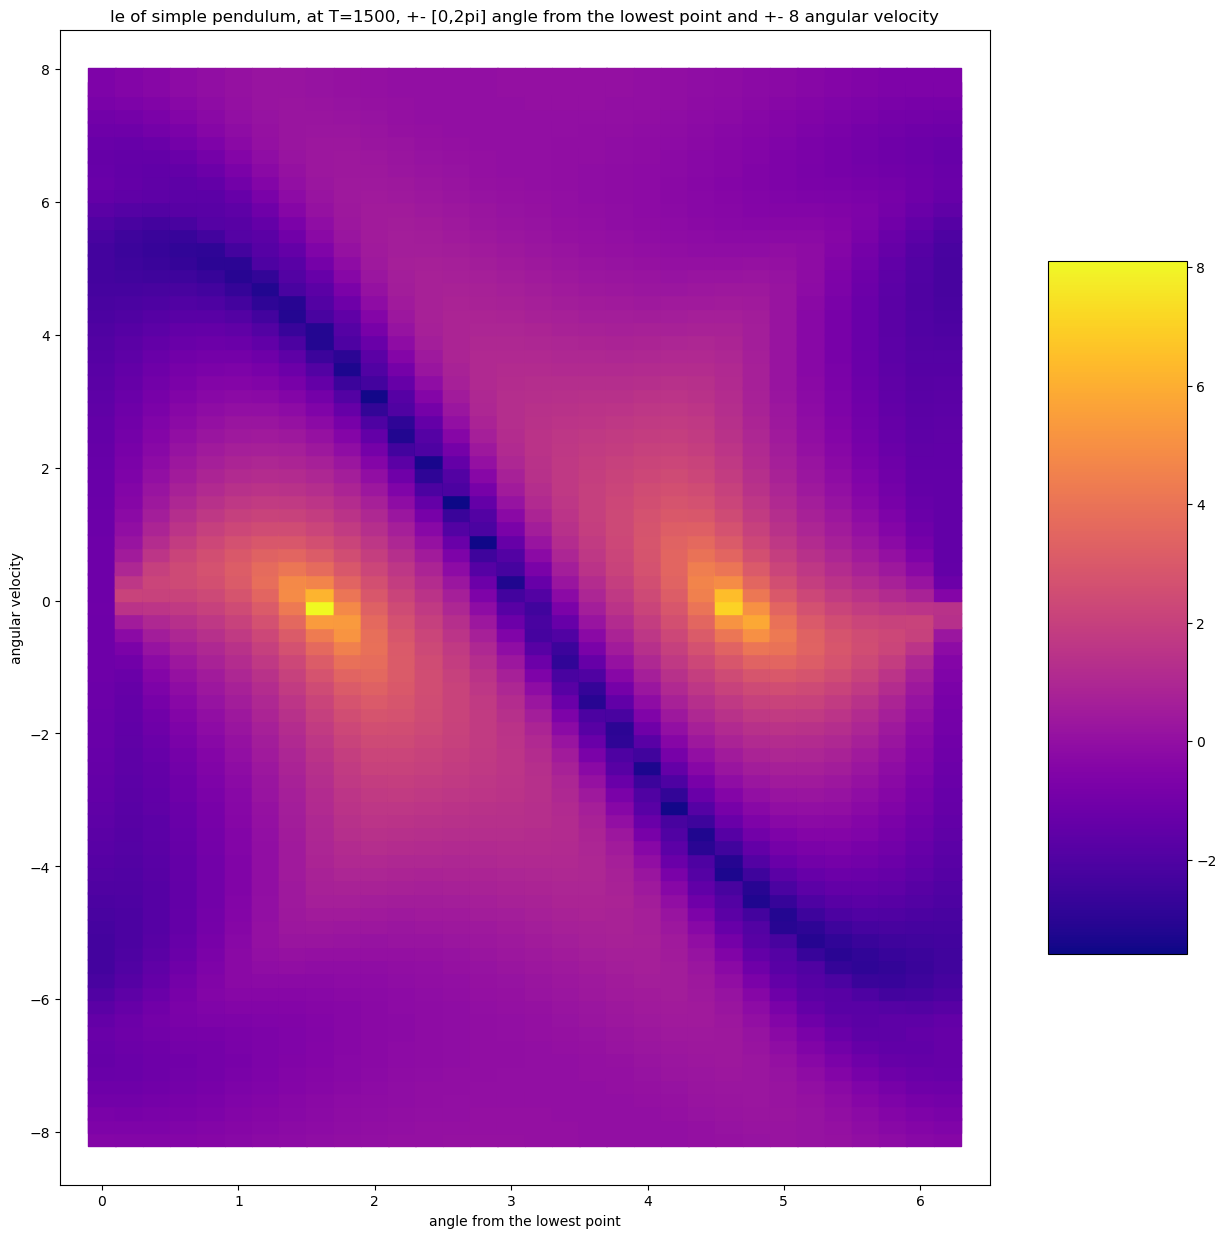

In [43]:
fig = plt.figure(figsize=(15,15))
ax = fig.add_subplot(111)

plot1 = ax.scatter(X_reshaped.T[0], X_reshaped.T[1], 
                   c=zs, cmap=plt.cm.plasma,vmin=zs.min(), vmax=zs.max(), s=400, marker="s")
cbar1 = fig.colorbar(plot1, shrink=0.6, aspect=5)
ax.set_xlabel('angle from the lowest point')
ax.set_ylabel('angular velocity')
plt.title ('le of simple pendulum, at T={}, +- [0,2pi] angle from the lowest point and +- 8 angular velocity'.format(T))